In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [165]:
#last 12 months of precipatation data
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > oneyear).\
    order_by(Measurement.date).all()

##Load query data (last year of prcp data) into a Pandas DataFrame and set the index to the date colmn.


In [167]:

##Load query data (last year of prcp data) into a Pandas DataFrame and set the index to the date colmn.


In [168]:
import numpy as np
import pandas as pd
import datetime as dt

In [169]:

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as db
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [170]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [171]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [172]:
# We can view all of the classes(tables) that automap found
Base.classes.keys()

['measurement', 'station']

In [173]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [174]:
### Precipitation Analysis
# Design a query to retrieve the last 12 months of precipitation data
#first date
session = Session(engine)
result = session.query(Measurement).first()
#most recent date
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)



('2017-08-23',)


In [175]:
#last 12 months 
oneyear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(oneyear)

2016-08-23


In [176]:
#last 12 months of precipatation data
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > oneyear).\
    order_by(Measurement.date).all()


In [177]:
##Load query data (last year of prcp data) into a Pandas DataFrame and set the index to the date colmn.
#pandas data frame
prcp_df = pd.DataFrame(prcp_data)
print(prcp_df)

            date  prcp
0     2016-08-24  0.08
1     2016-08-24  2.15
2     2016-08-24  2.28
3     2016-08-24   NaN
4     2016-08-24  1.22
...          ...   ...
2218  2017-08-22  0.50
2219  2017-08-23  0.00
2220  2017-08-23  0.00
2221  2017-08-23  0.08
2222  2017-08-23  0.45

[2223 rows x 2 columns]


In [178]:
#set index to date and sort by date
prcp_df.set_index('date').sort_index()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


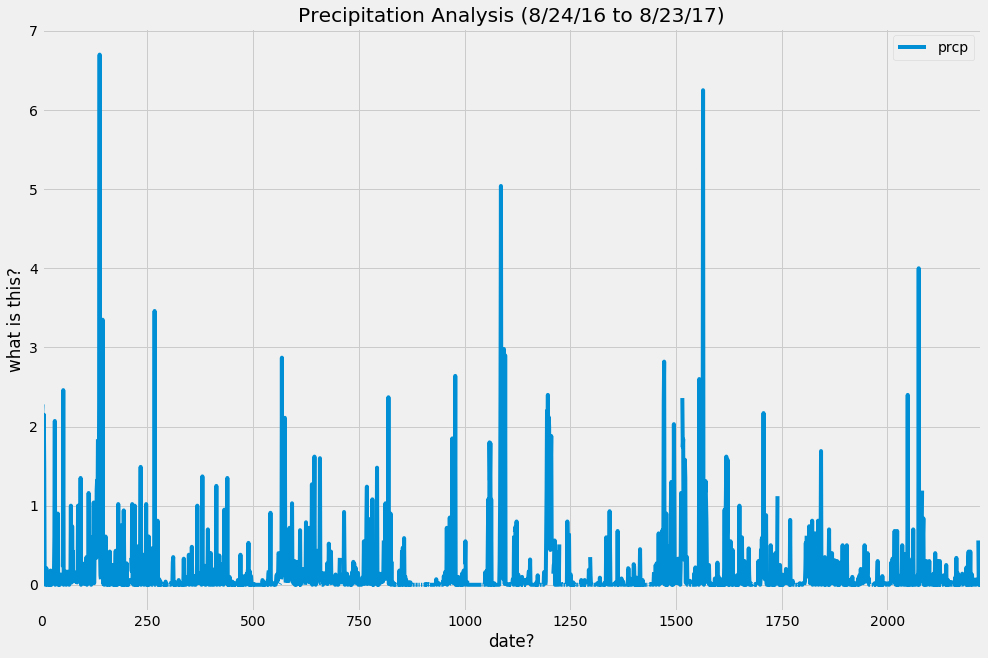

In [179]:
#Plot the results
prcp_plot = prcp_df.plot(figsize=(15,10))
prcp_plot.set_title("Precipitation Analysis (8/24/16 to 8/23/17)")
prcp_plot.set_xlabel('date?')
prcp_plot.set_ylabel('what is this?')
plt.show()

In [180]:
#print the summary stats for precipatation data.
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [181]:
### Station Analysis
session = Session(engine)
result = session.query(Station).first()
#first station
station = session.query(Station.name).order_by(Station.name.desc()).all()
print(station)

[('WAIMANALO EXPERIMENTAL FARM, HI US',), ('WAIKIKI 717.2, HI US',), ('WAIHEE 837.5, HI US',), ('UPPER WAHIAWA 874.3, HI US',), ('PEARL CITY, HI US',), ('MANOA LYON ARBO 785.2, HI US',), ('KUALOA RANCH HEADQUARTERS 886.9, HI US',), ('KANEOHE 838.1, HI US',), ('HONOLULU OBSERVATORY 702.2, HI US',)]


In [182]:
#Total number of stations
station_count = session.query(Station).count()
print(station_count)

9


In [183]:
#most active stations
from sqlalchemy import desc
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
    group_by(Measurement.station).order_by(desc('count')).all()
print (active_stations)         

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [184]:
#station with highest number of observations
max_observations = max(active_stations)
print (max_observations)

('USC00519523', 2669)


In [185]:
#Station name with highest number of observations
highest_obs_name = session.query(Station).\
    filter('saname'== max_observations)
print(highest_obs_name)

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station 
WHERE 0 = 1


In [186]:
#query to retrive last 12 months of tobs filtered by the station 
#with the highest number of observations.
tobs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > oneyear).\
    filter(Measurement.station == 'USC00519523').\
    order_by(Measurement.date).all()


In [187]:
#pandas dataframe
tobs_df = pd.DataFrame(tobs_data)
print(prcp_df)






            date  prcp
0     2016-08-24  0.08
1     2016-08-24  2.15
2     2016-08-24  2.28
3     2016-08-24   NaN
4     2016-08-24  1.22
...          ...   ...
2218  2017-08-22  0.50
2219  2017-08-23  0.00
2220  2017-08-23  0.00
2221  2017-08-23  0.08
2222  2017-08-23  0.45

[2223 rows x 2 columns]


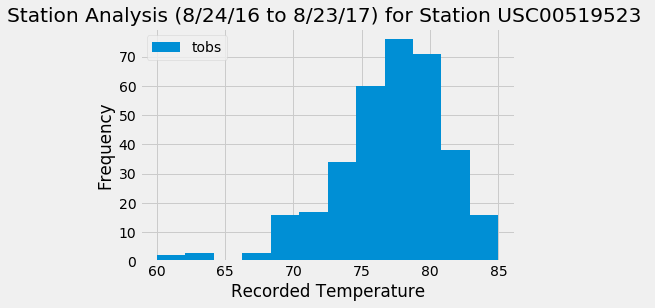

In [188]:
#Plot the results as a histogram with 'bins=12'
tobs_plot = tobs_df.plot.hist(bins=12)
tobs_plot.set_xlabel("Recorded Temperature")
tobs_plot.set_ylabel("Frequency")
tobs_plot.set_title("Station Analysis (8/24/16 to 8/23/17) for Station USC00519523 ")

plt.show()

In [191]:
# Step 2-Climate App
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'
